In [5]:
from google.colab import files
import pandas as pd

# Upload Excel file
uploaded = files.upload()  # Select SuperStore Sales DataSet.xlsx
df = pd.read_excel(next(iter(uploaded.keys())))

# Preview
display(df.head())

Saving SuperStore Sales DataSet.xlsx to SuperStore Sales DataSet (2).xlsx


,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode
0,4918,CA-2019-160304,2019-01-01,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.94,1,28.2668,0,Online
1,4919,CA-2019-160304,2019-01-02,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.94,3,38.2668,0,Online
2,4920,CA-2019-160304,2019-01-02,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,East,TEC-PH-10000455,Technology,Phones,GE 30522EE2,231.98,2,67.2742,0,Cards
3,3074,CA-2019-125206,2019-01-03,2019-01-05,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,...,West,OFF-ST-10003692,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,114.46,2,28.6150,0,Online
4,8604,US-2019-116365,2019-01-03,2019-01-08,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,...,Central,TEC-AC-10002217,Technology,Accessories,Imation Clip USB flash drive - 8 GB,30.08,2,-5.2640,0,Online


In [6]:
# Check shape and columns
print("Dataset shape:", df.shape)
print("Columns:", df.columns)

# Check for missing values
print(df.isnull().sum())

# Basic statistics
print(df.describe())


Dataset shape: (5901, 21)
Columns: Index(['Row ID+O6G3A1:R6', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Profit', 'Returns', 'Payment Mode'],
      dtype='object')
Row ID+O6G3A1:R6    0
Order ID            0
Order Date          0
Ship Date           0
Ship Mode           0
Customer ID         0
Customer Name       0
Segment             0
Country             0
City                0
State               0
Region              0
Product ID          0
Category            0
Sub-Category        0
Product Name        0
Sales               0
Quantity            0
Profit              0
Returns             0
Payment Mode        0
dtype: int64
       Row ID+O6G3A1:R6                     Order Date  \
count       5901.000000                           5901   
mean        5022.422471  2020-02-29 01:53:57.620742144

In [8]:
# Convert Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Drop rows with missing critical values
df.dropna(subset=['Order Date', 'Sales', 'Profit', 'Product Name', 'Category'], inplace=True)

# Optional: reset index
df.reset_index(drop=True, inplace=True)

display(df.head())

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode
0,4918,CA-2019-160304,2019-01-01,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.94,1,28.2668,0,Online
1,4919,CA-2019-160304,2019-01-02,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.94,3,38.2668,0,Online
2,4920,CA-2019-160304,2019-01-02,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,East,TEC-PH-10000455,Technology,Phones,GE 30522EE2,231.98,2,67.2742,0,Cards
3,3074,CA-2019-125206,2019-01-03,2019-01-05,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,...,West,OFF-ST-10003692,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,114.46,2,28.6150,0,Online
4,8604,US-2019-116365,2019-01-03,2019-01-08,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,...,Central,TEC-AC-10002217,Technology,Accessories,Imation Clip USB flash drive - 8 GB,30.08,2,-5.2640,0,Online


In [9]:
# Total Sales, Profit, Profit Margin
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
profit_margin = (total_profit / total_sales) * 100

print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Profit Margin: {profit_margin:.2f}%")


Total Sales: $1,565,804.32
Total Profit: $175,262.11
Profit Margin: 11.19%


Top 5 Products by Sales:
 Product Name
3D Systems Cube Printer, 2nd Generation, Magenta    14334.890
Canon imageCLASS 2200 Advanced Copier               14076.824
Hewlett Packard LaserJet 3310 Copier                13837.732
GBC DocuBind TL300 Electric Binding System          12890.258
GBC DocuBind P400 Electric Binding System           12577.108
Name: Sales, dtype: float64


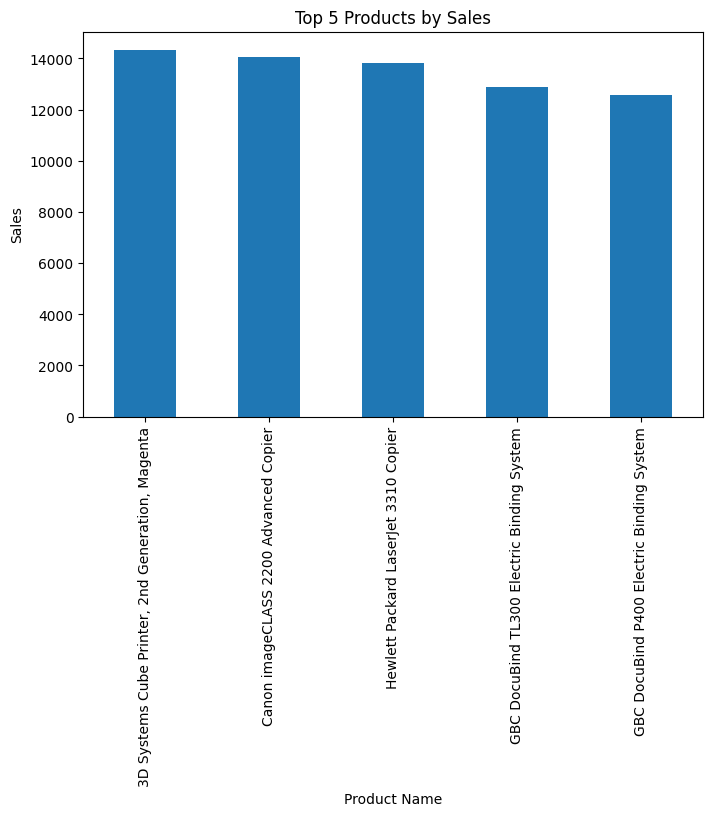

In [10]:
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(5)
print("Top 5 Products by Sales:\n", top_products)

# Optional: Bar chart
import matplotlib.pyplot as plt
top_products.plot(kind='bar', figsize=(8,5), title='Top 5 Products by Sales')
plt.ylabel('Sales')
plt.show()



Sales by Region:
 Region
Central    341007.5242
East       450234.6660
South      252121.0810
West       522441.0520
Name: Sales, dtype: float64


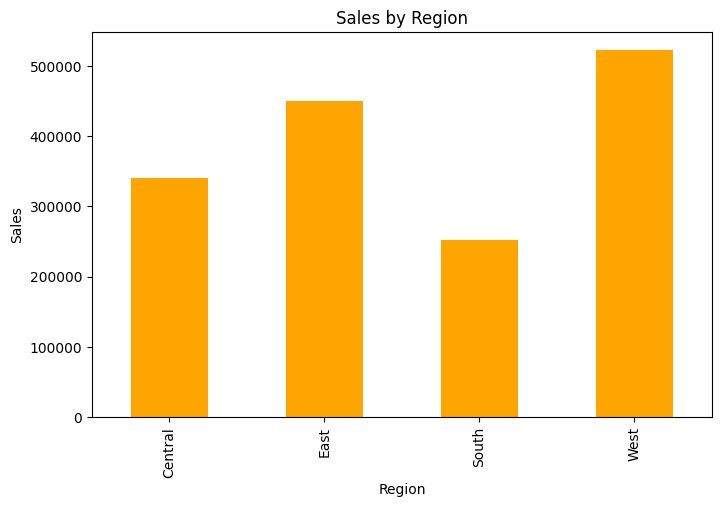

In [11]:
sales_region = df.groupby('Region')['Sales'].sum()
print("\nSales by Region:\n", sales_region)

sales_region.plot(kind='bar', figsize=(8,5), title='Sales by Region', color='orange')
plt.ylabel('Sales')
plt.show()


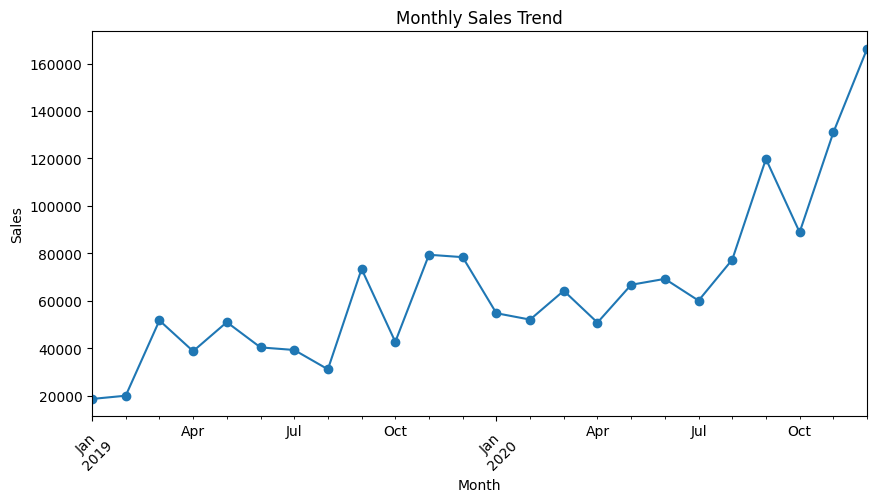

In [13]:
df['Month'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum()

monthly_sales.plot(kind='line', figsize=(10,5), marker='o', title='Monthly Sales Trend')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

In [14]:
df.to_csv('superstore_sales_cleaned.csv', index=False)
files.download('superstore_sales_cleaned.csv')  # download to local


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>